# Building an Image Classifier using the Sequential API.

- We'll use the MNIST fashio dataset (70,000 grascale images of 28x28 pixels each with 10 classes)

In [1]:
import tensorflow as tf
from tensorflow import keras

## Loading the Dataset Using keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

# Unlike scikitlearn every image is represented as a 28x28 array rather than a 1D array of size 784
# The pixel intensities are represented as integers from (0.0 to 255.0)

In [3]:
# checking the shape of the dataset.

X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
# Scaling the pixel intensities by didving them by 255, this is because we are going to train the net using gradient descent.

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
# For the fashion MNIST we need the list of class names to know what we are dealing with.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker","Bag", "Ankle boot"]

# e.g the first image in the dataset represents a coat.
class_names[y_train[0]]

'Coat'

## Creating the Model using the Sequential API.

In [7]:
# A classification MLP with two hidden layers.

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")                   
])

C:\Users\arnol\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [10]:
# all parameters of a layer can be accessed using its get_weights() and set_weights() methods.
# for dense layers this includes both the connection weights and the bias terms.

hidden1 = model.layers[1]
hidden1.name

'dense'

In [11]:
model.get_layer('dense') is hidden1

True

In [12]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00516444, -0.02504402, -0.04245186, ..., -0.00579966,
         0.06275779,  0.02358665],
       [-0.03889136,  0.07339972, -0.03951875, ..., -0.04972213,
        -0.01320729, -0.03826538],
       [ 0.032098  , -0.0257639 ,  0.05387568, ...,  0.01088716,
        -0.05063794, -0.00685623],
       ...,
       [-0.00281399,  0.0461935 ,  0.032357  , ..., -0.02096217,
        -0.03255402,  0.02687895],
       [ 0.01011892, -0.03708576, -0.02845327, ..., -0.03292669,
         0.04224985, -0.00179386],
       [ 0.06953739, -0.04838895,  0.0537391 , ..., -0.00596838,
         0.03088384, -0.0480387 ]], dtype=float32)

In [13]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
biases.shape

(300,)

### Compiling the Model

In [15]:
# Compiling the model to specify its loss function and the optimizer to use. We can also specify a list of extra metrics to compute,
# during training and evaluation:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and Evaluating the Model

In [16]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6746 - loss: 0.9897 - val_accuracy: 0.8220 - val_loss: 0.5176
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8264 - loss: 0.5016 - val_accuracy: 0.8416 - val_loss: 0.4678
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8385 - loss: 0.4583 - val_accuracy: 0.8498 - val_loss: 0.4291
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8533 - loss: 0.4212 - val_accuracy: 0.8590 - val_loss: 0.4054
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8597 - loss: 0.3999 - val_accuracy: 0.8628 - val_loss: 0.3898
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8652 - loss: 0.3821 - val_accuracy: 0.8700 - val_loss: 0.3778
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8708 - loss: 0.3671 - val_accuracy: 0.8678 - val_loss: 0.3843
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8728 - loss: 0.35

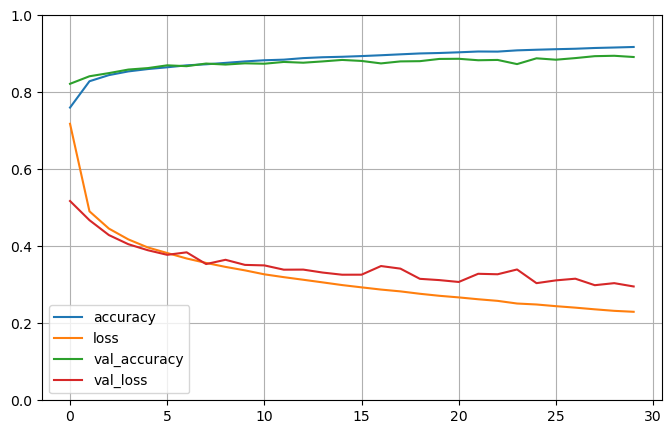

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [18]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9224 - loss: 0.2177 - val_accuracy: 0.8862 - val_loss: 0.3151
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9220 - loss: 0.2189 - val_accuracy: 0.8928 - val_loss: 0.3008
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9211 - loss: 0.2178 - val_accuracy: 0.8760 - val_loss: 0.3352
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9212 - loss: 0.2169 - val_accuracy: 0.8928 - val_loss: 0.2941
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9240 - loss: 0.2088 - val_accuracy: 0.8950 - val_loss: 0.2931
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9249 - loss: 0.2091 - val_accuracy: 0.8890 - val_loss: 0.3059
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9266 - loss: 0.2036 - val_accuracy: 0.8862 - val_loss: 0.3168
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9279 - loss: 0.1997 - 

In [20]:
# Evaluating the model.

model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8517 - loss: 63.9541


[65.24327850341797, 0.8500999808311462]

## Using the model to make predictions

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
# Getting the class with the highest probability.
import numpy as np

y_pred = np.argmax(y_proba, axis=1)

y_pred

array([9, 2, 1], dtype=int64)

In [26]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [27]:
# The classifier was correct in classifying all the three images.